## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [44]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [45]:
df = pd.read_csv('ab_data.csv', parse_dates=['timestamp'])
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [46]:
df_orig_shape = df.shape[0]
df_orig_shape

294478

c. The number of unique users in the dataset.

In [47]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [48]:
df.groupby('converted').count().apply(lambda x: x * 100 / x.sum())

,user_id,timestamp,group,landing_page
converted,,,,
0,88.034081,88.034081,88.034081,88.034081
1,11.965919,11.965919,11.965919,11.965919


e. The number of times the `new_page` and `treatment` don't match.

In [49]:
df_no_match = df.query('(group == "treatment" & landing_page != "new_page") | (group != "treatment" & landing_page == "new_page")')
df_no_match.shape[0]

3893

f. Do any of the rows have missing values?

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null datetime64[ns]
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [51]:
df2 = df.drop(df_no_match.index)

In [52]:
#double check wheter we have successfully dropped all incorrect rows
#this should be True if we were successful
df2.shape[0] + df_no_match.shape[0] == df_orig_shape

True

In [53]:
df2.shape

(290585, 5)

In [54]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [55]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [56]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [57]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [58]:
df2.shape

(290585, 5)

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [59]:
#droppging the row with the diplicated user id
df2.drop_duplicates('user_id', inplace=True)

#making sure the duplicated row has been dropped
#result should be 145310 if correct
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [60]:
df2.groupby('converted').count().apply(lambda x: x * 100 / x.sum())

,user_id,timestamp,group,landing_page
converted,,,,
0,88.040291,88.040291,88.040291,88.040291
1,11.959709,11.959709,11.959709,11.959709


b. Given that an individual was in the `control` group, what is the probability they converted?

In [61]:
df2.query('group == "control"').groupby('converted').count().apply(lambda x: x * 100 / x.sum())

,user_id,timestamp,group,landing_page
converted,,,,
0,87.96137,87.96137,87.96137,87.96137
1,12.03863,12.03863,12.03863,12.03863


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [62]:
df2.query('group == "treatment"').groupby('converted').count().apply(lambda x: x * 100 / x.sum())

,user_id,timestamp,group,landing_page
converted,,,,
0,88.119193,88.119193,88.119193,88.119193
1,11.880807,11.880807,11.880807,11.880807


d. What is the probability that an individual received the new page?

In [63]:
df2.groupby('landing_page').count().apply(lambda x: x * 100 / x.sum())

,user_id,timestamp,group,converted
landing_page,,,,
new_page,50.006194,50.006194,50.006194,50.006194
old_page,49.993806,49.993806,49.993806,49.993806


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**We don't have sufficient evidence to conclude that the new treatment page leads to more conversions.**

**Based on the results above we can observe that the probability of conversion in case of the old site is slightly higher (12.03%) than in case of the new site (11.88%)**

**We need to take into account other factors into the analysis like geographies or demographic data.
We also need to make sure that Simpson's paradox does not lead us to make false conclusions when we are looking at the data from different perspectives.**



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$: **$p_{old}$** - **$p_{new}$** >= 0

$H_{1}$: **$p_{old}$** - **$p_{new}$** < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [64]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [65]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [66]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [67]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [68]:
new_page_converted = np.random.choice([0,1], n_new, p=[1-p_new, p_new])
new_page_converted.mean()

0.11972335007914114

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [69]:
old_page_converted = np.random.choice([0,1], n_old, p=[1-p_old, p_old])
old_page_converted.mean()

0.11856904883186255

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [70]:
p_new - p_old

0.0

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [71]:
#simulating sampling distribution for conversion rates
#and calculating the difference between the probabilities of the new and old page

p_new_sim = np.random.binomial(n_new, p_new, 10000)/n_new
p_old_sim = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = p_new_sim - p_old_sim


#p_diffs = []
#for _ in range(10000):
#    p_new_sim = np.random.choice([0,1], n_new, p=[1-p_new, p_new]).mean()
#    p_old_sim = np.random.choice([0,1], n_old, p=[1-p_old, p_old]).mean()
#    p_diffs.append(p_new_sim - p_old_sim)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

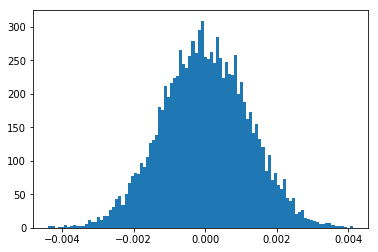

In [72]:
#plotting a histogram for the p_diffs to visually observe whether it is normally distributed
plt.hist(p_diffs, bins=100);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [73]:
p_diffs = np.array(p_diffs)
obs_diffs = (df2.query('landing_page == "new_page"').converted.mean() - 
            df2.query('landing_page == "old_page"').converted.mean())
(p_diffs > obs_diffs).mean()

0.90480000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value we have calculated in j. called the p value**

**The p value represents the probability of observing our data or something more extreme in favour of the alternative given the null hypothesis is true.**

**A large p value indicates  that there is a large probability that our data is coming from the null.**

**Depending on the significance level of our test, we can reject or fail to reject the null hypothesis. The typical significance level for business applications is alpha = 0.05. Our calculated p-value (0.899) is higher than this signicifance level, so based on our data we don't have evidence to reject the null.**

**We fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [74]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "old_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [75]:
#using a z-test to calculate the z-score and the p-value
#this is an alternative method to the hypothesis test we performed above
zstat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(zstat)
print(pval)

1.28632078586
0.900834434411


In [76]:
#Calculating the critical z-value for 95% confience interval
#We will compare it to the z-score we calculate in the above cell
from scipy.stats import norm
norm.ppf(1-(0.05))

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-test is a type of hypothesis test. If our calculated z test statistic is higher than the critical z-value from the z distribution that belongs to the required significance level it means that we have statistical evidence to reject the null hypothesis.**
**I have calculated the the critical z-value using sciipy norm function using 95% confidence interval**
**The calculated z-value is 1.645 and our z-statistic is 1.286. This means based on the statistical evidence we have failed to reject the null hypothesis**


**The p value calculated from our z-statistic is 0.900 which is very clost to what we simulated in j. and k.**

**The findings in l are in agreement with the findings in j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [77]:
#preparing the data for the regression model by:
#1) adding the necessary 'intercept' column and,
#2) creating the dummy variables
df2['intercept'] = 1
df_page = pd.DataFrame()
df_page[['ab_page', 'old']] = pd.get_dummies(df2['landing_page'])
df2 = df2.join(df_page)

In [78]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [79]:
#initializing and fitting the Logistic Regression model
logireg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = logireg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [80]:
#getting the summary of the Logistic Regression model we created in the above cell
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-29 23:09 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**p-value assiciated with the ab_page is 0.1897**

**this is different from the value we found in part two because the this is a two sided test, while in part two we had a one sided test.**

one sided:
$H_{0}$: **$p_{old}$** - **$p_{new}$** >= 0

two sided:
$H_{0}$: **$p_{old}$** - **$p_{new}$** ≠ 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding other factors to the model can be a good idea because it can lead to a more accurate model.**

**If there are more than one factor that explains the variance of a variable we can get a more accurate model if we include all those factors. Otherwise we limit our model to rely only on part of the influencing factors**

**We also need to be careful and avoid using variables that are (highly) correlated to each other. This is called multicollinearity and can cause strange, flipped coefficients**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [81]:
#rading in the addition country data and joining it to our dataframe
df_c = pd.read_csv('countries.csv')
df2 = df2.join(df_c['country'])

In [82]:
#Creating dummy variables for the new joined country data
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])

#Creating a logistic regression model, based on the country data.
logireg = sm.Logit(df2['converted'], df2[['intercept', 'UK', 'US']])
result = logireg.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-29 23:09 AIC:              212782.7363
No. Observations:   290584           BIC:              212814.4753
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0197    0.0231  -87.5238  0.0000  -2.0650  -1.9745
UK             0.0297    0.0258    1.1514  0.2496  -0.0208   0.0802
US             0.0234    0.0241    0.9716  0.3312  -0.0238   0.0706
==================================================================

"""

**Since the p value for both countries are above 0.05 (which is the typical alpha level for business applications), we have no statistical evidence that the country has a significant effect on the conversion rate**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [83]:
#Creating interaction data for the explanatory variables
df2['UK_new'] = df2['UK'] * df2['ab_page']
df2['US_new'] = df2['US'] * df2['ab_page']
exog = pd.DataFrame()
exog = df2[['intercept', 'UK_new', 'US_new', 'UK', 'US', 'ab_page']]

#Creating a logistic regression model, based on the interaction between the
#page and the country columns
logireg = sm.Logit(df2['converted'], exog)
result = logireg.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366111
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-29 23:09 AIC:              212784.1015
No. Observations:   290584           BIC:              212847.5794
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0497    0.0331  -61.9451  0.0000  -2.1145  -1.9848
UK_new        -0.0699    0.0516   -1.3554  0.1753  -0.1710   0.0312
US_new        -0.0818    0.0482   -1.6981  0.0895  -0.1762   0.0126
UK             0.0651    0.0368    1.7666  0.0773  -0.0071   0.1373
US             0.0647    0.0345    1.8777  0.0604  -0.0028   0.1323
ab_page        0.0589    0.0462    1.2755  0.2021  -0.0316   0.1494
==================================================================

"""

**p value for all three variables are above 0.05, so we have no statistical evidence that our variables have signicifanct impact on the conversion rate**

**as a final statement I suggest the company stays witht the old website, since based on our data we were not able to prove that the new website brings significantly more conversion**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [84]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0